In [126]:
"""
偏最小二乘法进行回归，相对于ols有更多的提取特征优化
"""

'\n偏最小二乘法进行回归，相对于ols有更多的提取特征优化\n'

In [1]:
import numpy as np
import pandas as pd
train_input_txt = pd.read_table('train_input.txt',header = None)
output_txt = pd.read_table('output.txt',header = None)

In [2]:
# 变成数组形式
import preprocess
train_input=np.loadtxt('train_input.txt',dtype=np.float32)
train_input[np.isnan(train_input)] = -1
train_input = preprocess.smaller_than_zero(train_input)
output=np.loadtxt('output.txt',dtype=np.float32)

nan count -> 0


In [4]:
data_train=pd.DataFrame(train_input)
data_output=pd.DataFrame(output)
data_train.describe()

,0,1,2,3,4,5,6
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,0.267261,0.666737,0.580088,0.477875,0.692119,0.677660,0.649399
std,0.094676,0.037017,0.212365,0.115486,0.103215,0.154045,0.166252
min,0.008426,0.557551,0.001440,0.165742,0.051885,0.115021,0.078406
25%,0.216242,0.647887,0.456182,0.376166,0.666106,0.563542,0.527144
50%,0.247621,0.665164,0.622178,0.476069,0.712823,0.721214,0.694653
75%,0.295794,0.683569,0.727721,0.551845,0.742041,0.791088,0.774855
max,0.812926,1.381089,1.349245,0.976177,1.227174,1.203539,1.399412


In [5]:
data_output.describe()

,0
count,1596.000000
mean,0.258098
std,0.137538
min,0.019020
25%,0.178341
50%,0.244987
75%,0.296984
max,1.000000


In [5]:
data_train.columns=['A','B','C','D','E','F','G']
data_output.columns = ['Y']


In [6]:
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
# pls = PLSRegression(n_components=3, max_iter=500)
pls = PLSRegression()
param_grid = {
    "n_components": [3, 4, 5, 6, 7],
    "tol": [0.001, 0.0001, 0.00001, 0.000001, 0.0000001],
    "max_iter": [500, 600, 700, 800, 900, 1000]
}
x = data_train[['A','B','C','D','E','F','G']]
y = data_output[['Y']]
clf = GridSearchCV(pls, param_grid=param_grid)
clf.fit(x, y)
print("best estimator ->", clf.best_estimator_)

best estimator -> PLSRegression(n_components=6, tol=0.001)


In [7]:
# x[np.isnan(x)] = 0
# x[np.isinf(x)] = 0
x=sm.add_constant(x)
pls = PLSRegression(n_components=6, tol=1e-03)
y_fitted = pls.fit(x,y).predict(x)
# data_train=sm.add_constant(data_train)
# data_train[np.isnan(data_train)] = 0
# data_train[np.isinf(data_train)] = 0
# y_fitted = pls.fit(data_train,data_output)

F:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


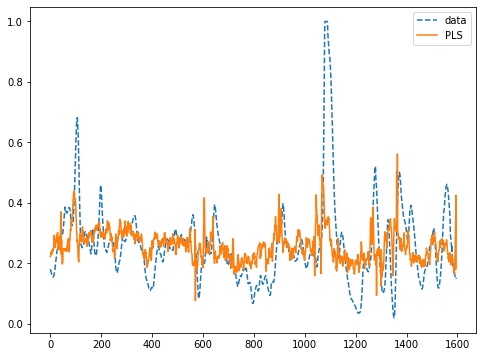

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(data_output, '--', label='data')
ax.plot(y_fitted, '-',label='PLS')
ax.legend(loc='best')

In [9]:
test_input_txt = pd.read_table('test_input.txt',header = None)
test_input=np.loadtxt('test_input.txt',dtype=np.float32)
data_test=pd.DataFrame(test_input)
data_test.describe()

,0,1,2,3,4,5,6
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,0.317369,0.671641,0.635688,0.352175,0.591209,0.507335,0.470041
std,0.110661,0.090869,0.162876,0.142608,0.142461,0.122640,0.117860
min,0.040359,0.031766,0.174480,0.000282,0.001254,0.015904,0.010062
25%,0.258151,0.667573,0.545045,0.357026,0.531429,0.432439,0.396137
50%,0.305178,0.685803,0.625497,0.364650,0.619565,0.493633,0.466793
75%,0.360525,0.702688,0.749335,0.375342,0.690893,0.570895,0.535680
max,1.001941,0.782632,0.965611,1.133764,0.897153,0.926988,0.851098


F:\Python\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


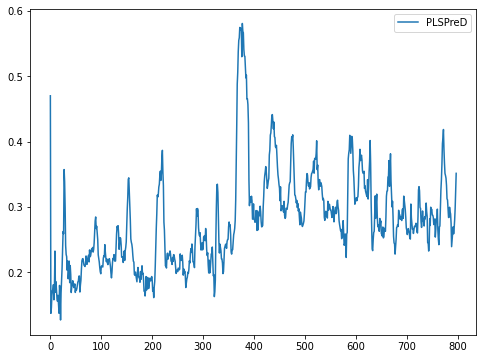

In [10]:
data_test.columns=['A','B','C','D','E','F','G']
xx = data_test[['A','B','C','D','E','F','G']]
xx=sm.add_constant(xx)
xx[np.isnan(xx)] = 0
# xx[np.isinf(xx)] = 0
from matplotlib import pyplot as plt
pls = PLSRegression(n_components=6, tol=0.001)
y_test = pls.fit(x,y).predict(xx)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y_test, '-',label='PLSPreD')
ax.legend(loc='best')

In [12]:
# y_test.to_excel("test_pls.xlsx")
y_test = pd.DataFrame(y_test)
y_test.index = np.linspace(1,798,798)
y_test.to_csv("test_pls.csv")

In [11]:
# y_fitted, y
from sklearn import metrics
# data_pre = model.predict(X_test)
MSE = metrics.mean_squared_error(y_fitted, y)
print("MSE  ->", MSE)
RMSE = metrics.mean_squared_error(y_fitted, y)**0.5
print("RMSE ->", RMSE)

MSE  -> 0.016454615121780987
RMSE -> 0.12827554373995453


In [13]:
fgnb = pd.read_csv("test_pls.csv", dtype=np.float32)

In [14]:
print(fgnb.columns)

Index(['Unnamed: 0', '0'], dtype='object')


In [16]:
fgnbfgnb = fgnb[fgnb.columns[1]]
print(np.shape(fgnbfgnb))

(798,)


In [17]:
MSE = metrics.mean_squared_error(fgnbfgnb, y_test)
print("MSE  ->", MSE)
RMSE = metrics.mean_squared_error(fgnbfgnb, y_test)**0.5
print("RMSE ->", RMSE)

MSE  -> 5.562758623851902e-17
RMSE -> 7.458390324897124e-09
